In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
url="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2" \
    "Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19


In [4]:
countries = {"Russia", "Italy", "Japan", "Spain", "Germany", "Korea, South", "Brazil", "Iran", "US", "Singapore"}

In [5]:
df[df["Country/Region"].isin(countries)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516
139,NaN,Japan,36.0000,138.0000,2,2,2,2,4,4,...,3139,3139,3654,3906,4257,4667,5530,6005,6748,7370
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,10156,10237,10284,10331,10384,10423,10450,10480,10512,10537
187,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,4731,5389,6343,7497,8672,10131,11917,13584,15770,18328
196,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,1189,1309,1375,1481,1623,1910,2108,2299,2532,2918
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,308853,337072,366667,396223,429052,461437,496535,526396,555313,580619


In [6]:
confirmed = dict()
for country in countries:
    cdf = df[(df["Country/Region"]==country) & (df["Province/State"].isnull())][df.columns[4:-1]].T
    if len(cdf.columns) > 0:
        confirmed[country] = np.array(cdf[cdf.columns[0]])

In [7]:
cdf = df[(df["Province/State"]=="Hubei")][df.columns[4:-1]].T
confirmed["Hubei"] = np.array(cdf[cdf.columns[0]])

In [8]:
import matplotlib.pyplot as plt

In [9]:
def exp_smoothing(lst, alpha=0.1):
    tmp_ = lst[0]
    result = [tmp_]
    for x in lst[1:]:
        tmp_ =  x * (1 - alpha) + alpha * tmp_
        result.append(tmp_)
    return result

In [10]:
def division_smoothed(lst):
    result = []
    for prev, cur in zip(lst[:-1], lst[1:]):
        if prev < 1.0:
            result.append(1.0)
        else:
            result.append(cur / prev)
    return result

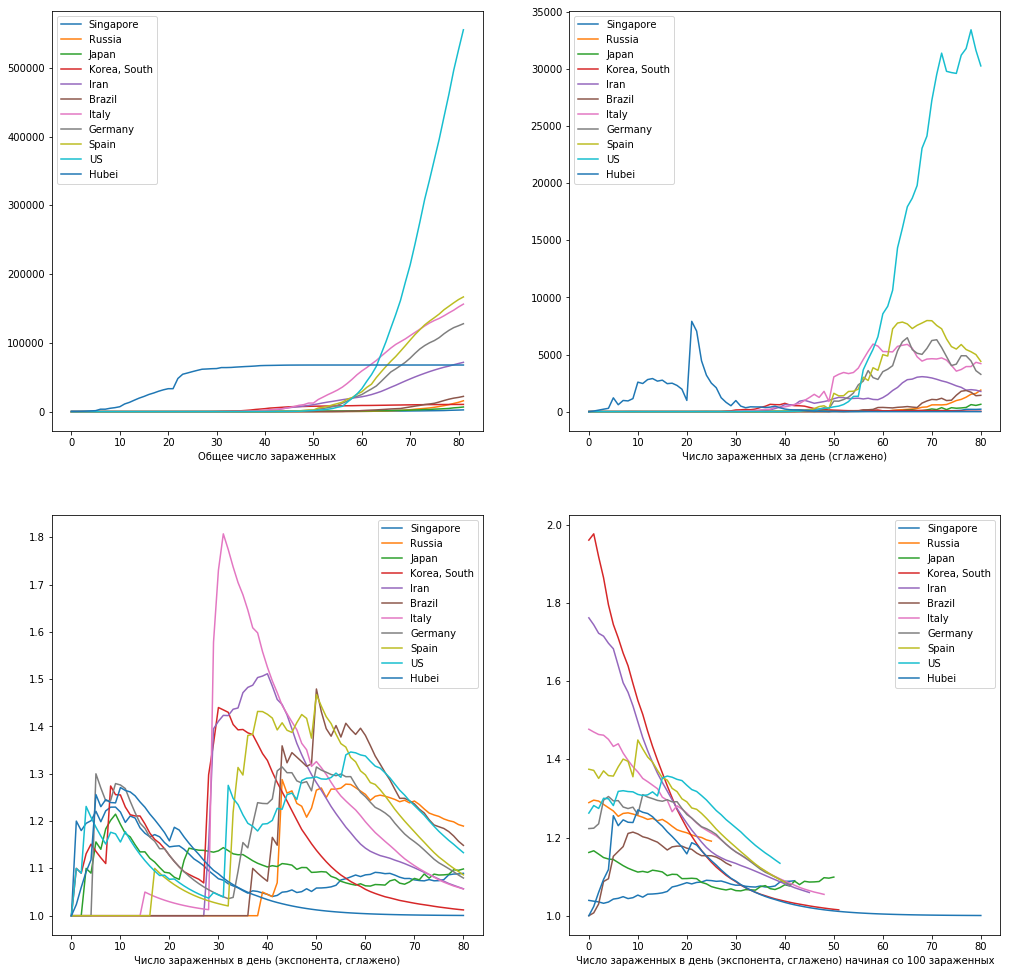

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(17, 17))
ax[0, 0].set_xlabel("Общее число зараженных")
for country, cases in confirmed.items():
    ax[0, 0].plot(range(0, len(cases)), cases, label=country)
ax[0, 0].legend()

ax[0, 1].set_xlabel("Число зараженных за день (cглажено)")
for country, cases in confirmed.items():
    ax[0, 1].plot(range(0, len(cases) - 1), exp_smoothing(cases[1:] - cases[:-1], alpha=0.5), label=country)
ax[0, 1].legend()

ax[1, 0].set_xlabel("Число зараженных в день (экспонента, сглажено)")
for country, cases in confirmed.items():
    ax[1, 0].plot(range(0, len(cases) - 1), exp_smoothing(division_smoothed(cases), alpha=0.9), label=country)
ax[1, 0].legend()

ax[1, 1].set_xlabel("Число зараженных в день (экспонента, сглажено) начиная со 100 зараженных")
for country, cases in confirmed.items():
    cases = cases[cases.searchsorted(100):]
    ax[1, 1].plot(range(0, len(cases) - 1), exp_smoothing(cases[1:] / (cases[:-1]), alpha=0.9), label=country)
ax[1, 1].legend()

fig.savefig("covid19.png")
plt.show()

In [12]:
import scipy as sc
import scipy.optimize
from math import exp

In [13]:
def logistic_function(x, a, b, x0):
    #print(x, a, b, x0)
    return a / (1.0 + np.exp(-b * (x - x0)))

D:\Programming\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


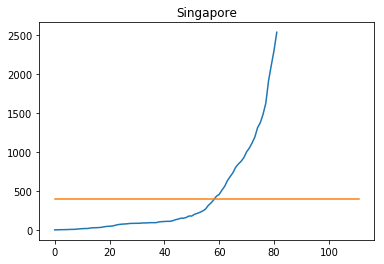

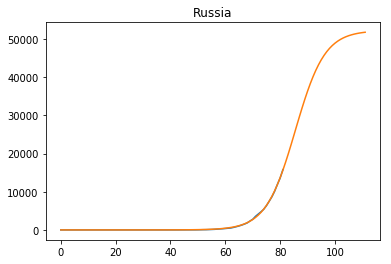

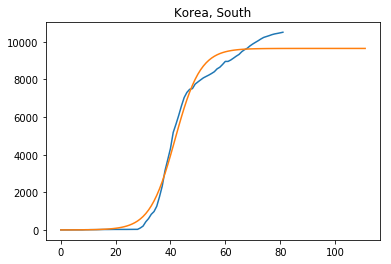

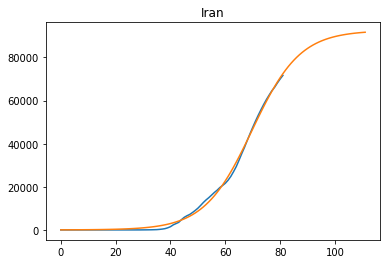

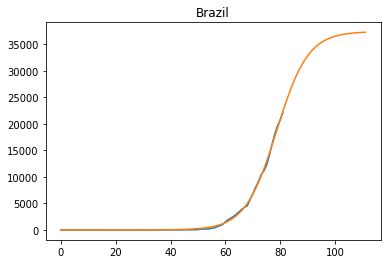

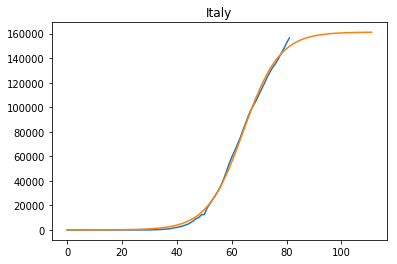

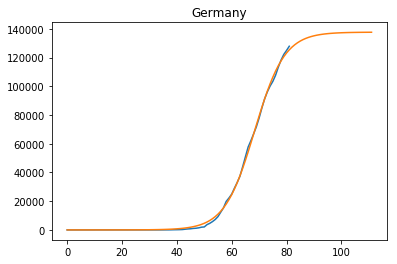

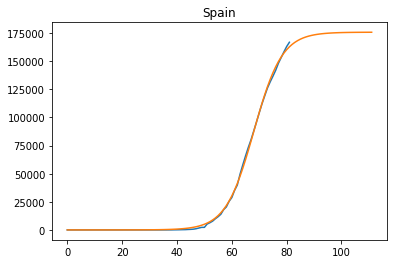

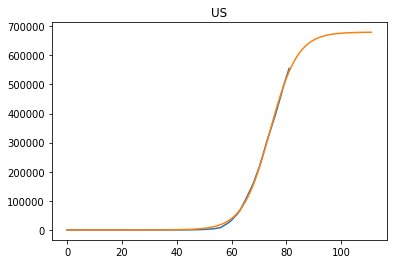

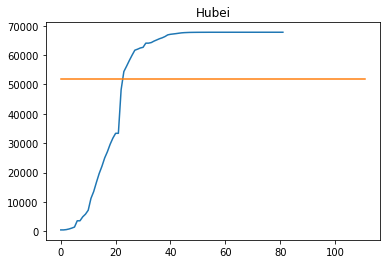

US: 679821.7941874324
Spain: 175781.87332400333
Italy: 161225.01445381003
Germany: 137657.9294473395
Iran: 92527.51449809356
Russia: 52188.71781396562
Hubei: 51840.56097560974
Brazil: 37393.62232588987
Korea, South: 9651.186614143684
Singapore: 391.62195309320254


In [14]:
expected_upper_bound = dict()

for country, cases in confirmed.items():
    x = list(range(len(cases)))
    x_extended = list(range(len(cases) + 30))
    y = cases
    try:
        params, pcov = sc.optimize.curve_fit(logistic_function, np.array(x), np.array(y))
    except RuntimeError:
        continue
        
    expected_upper_bound[country] = params[0]
    
    plt.plot(x, y, label="actual")
    plt.plot(x_extended, [logistic_function(xi, params[0], params[1], params[2]) for xi in x_extended], label="predicted")
    plt.title(country)
    plt.show()
        
# Фигню выдает, ожидаемо
for country, upper_bound in sorted(expected_upper_bound.items(), key=lambda x: -x[1]):
    print(f"{country}: {upper_bound}")

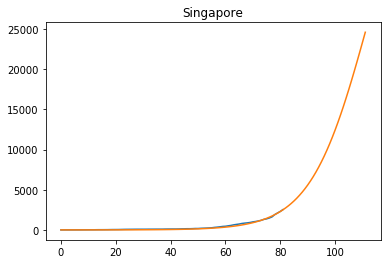

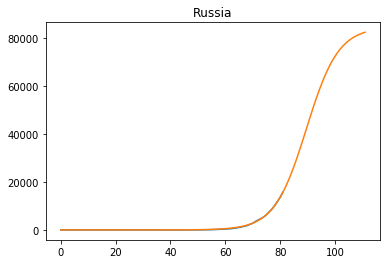

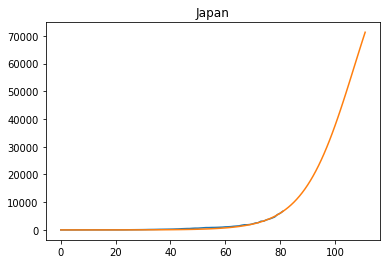

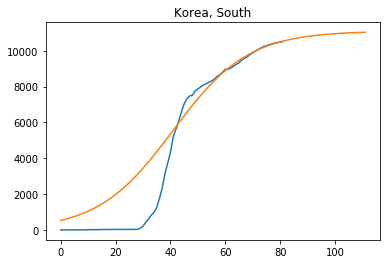

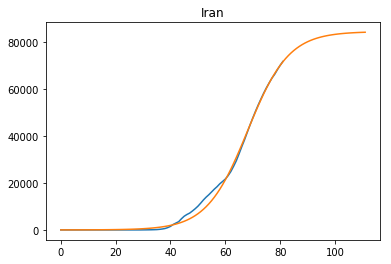

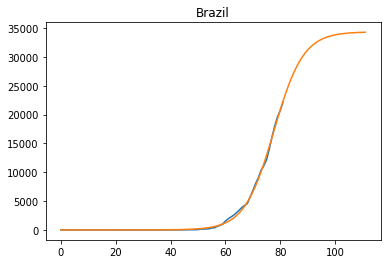

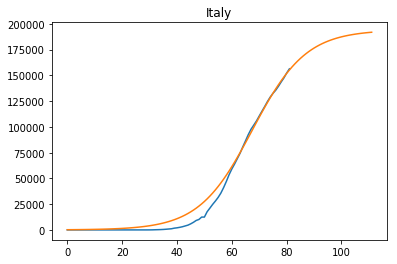

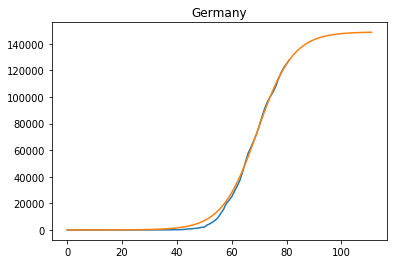

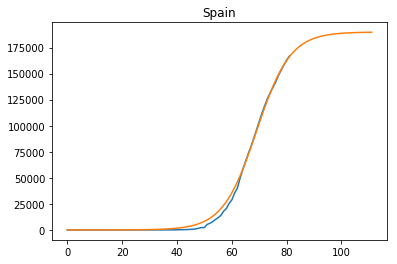

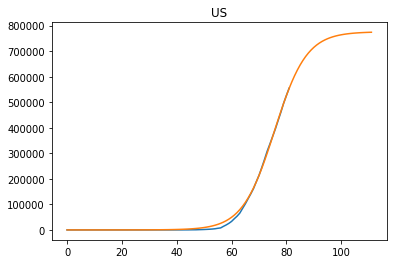

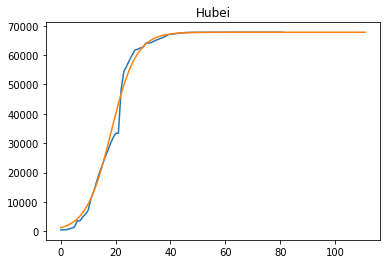

US: 775914.9001299453
Italy: 194119.84553634108
Spain: 189888.53317601304
Germany: 148947.4299020596
Japan: 117281.01205250871
Russia: 84684.20794875074
Iran: 84395.36018504947
Hubei: 67803.2101550154
Singapore: 51227.736831879825
Brazil: 34363.61765302796
Korea, South: 11098.130826788514


In [15]:
expected_upper_bound = dict()
 
for country, cases in confirmed.items():
    x = list(range(len(cases)))
    x_extended = list(range(len(cases) + 30))
    y = cases
    
    def J(args):
        a, b, x0 = args
        alpha = 0.8
        beta = 1.0
        result = 0.0
        for i in reversed(range(len(cases))):
            result += beta * (logistic_function(x[i], a, b, x0) - y[i]) ** 2 
            beta *= alpha
        return result / len(x)
    
    try:
        params = sc.optimize.minimize(J, [max(cases), 1.0, x[-1]], method='Nelder-Mead').x
    except Error:
        print("Error for ", country)
        continue
        
    expected_upper_bound[country] = params[0]
    
    plt.plot(x, y, label="actual")
    plt.plot(x_extended, [logistic_function(xi, params[0], params[1], params[2]) for xi in x_extended], label="predicted")
    plt.title(country)
    plt.show()
        
# Чуть получше, но тоже так себе
for country, upper_bound in sorted(expected_upper_bound.items(), key=lambda x: -x[1]):
    print(f"{country}: {upper_bound}")